## Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# Dataset : 911.csv

- We have a dataset shape of (99492,9).
- The dataset contains Categorical and Continous featured data.

__Our Goals__

- We will overview the data available.
- We will add new features to ease our understanding by Data Manipulation.
- This is entirely for Data Analysis and Data Visualisation.

## Load Data:

- Loading 911 data into test_data dataframe

In [3]:
test_data = pd.read_csv('911.csv')

print('Shape of test_data of 911.csv file', test_data.shape)

Shape of test_data of 911.csv file (99492, 9)


## Observation:

test_data has 99492 rows, 9 columns/features.


## Getting High level overview of the data.

In [4]:
print('Test data high level overview :')
print(test_data.info())

Test data high level overview :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB
None


## Observation:

Out of 9 features, 5 are categorical and 4 are numerical.

## Checking for missing values in dataset

In [5]:
print('Missing values:',test_data.isnull().values.sum())

test_data.isnull().sum()

Missing values: 13417


lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

# Observation
- We could see 13417 missing values in total.
- It is not necessary to drop or fill these missing values, as we are visualizing this missing data

## Checking unique top 5 for few columns/feautres

In [6]:
# Unique zip codes count
print('Unique zip codes count: ',test_data['zip'].nunique())

# Unique townships count
print('Unique townships count: ',test_data['twp'].nunique())

# Unique title of emergency codes
print('Unique title of emergency codes: ',test_data['title'].nunique())

Unique zip codes count:  104
Unique townships count:  68
Unique title of emergency codes:  110


## Observations:
- Unique zip codes count:  104
- Unique townships count:  68
- Unique title of emergency codes:  110

## Checking top 5 features for 911 calls

In [7]:
# top 5 townships for 911 calls

test_twp=test_data['twp'].value_counts().head(5).to_frame()
test_twp.rename(columns = {'twp' : 'Top 5 Townships'},inplace=True)
test_twp.style.background_gradient(cmap='PuBu')

,Top 5 Townships
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


In [8]:
# top 5 zipcodes for 911 calls

test_zip=test_data['zip'].value_counts().head(5).to_frame()
test_zip.rename(columns = {'zip' : 'Top 5 Zipcodes'},inplace=True)
test_zip.style.background_gradient(cmap='flare_r')

,Top 5 Zipcodes
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


In [9]:
# top 5 emergency titles for 911 calls

test_zip=test_data['title'].value_counts().head(5).to_frame()
test_zip.rename(columns = {'title' : 'Top 5 Titles'},inplace=True)
test_zip.style.background_gradient(cmap='icefire')

,Top 5 Titles
Traffic: VEHICLE ACCIDENT -,23066
Traffic: DISABLED VEHICLE -,7702
Fire: FIRE ALARM,5496
EMS: RESPIRATORY EMERGENCY,5112
EMS: CARDIAC EMERGENCY,5012


## Observations:

- The highest number of 911 calls is from LOWER MERION.
- The highest number of 911 calls is from 19401 zipcode.
- The highest number of 911 calls due to "Traffic: VEHICLE ACCIDENT". 

## Adding New Features

- Adding "Reason" and "Date" as new features.
- We have added new features to ease our Data Analysis.


__Reason Feature:__

The new Reason column can be added from Title Column/feature as the reason is followed by description.


In [10]:
test_data['Reason'] = test_data['title'].apply(lambda x : x.split(':')[0])

__Date Feature:__

The new columns is added for more features.

In [11]:
# converting string datatype to date-time datatype
test_data['timeStamp'] = pd.to_datetime(test_data['timeStamp'])

# adding hour column
test_data['hour'] = test_data['timeStamp'].apply(lambda x : x.hour)

# adding dayofweek column
test_data['dayofweek'] = test_data['timeStamp'].apply(lambda x : x.dayofweek)

# adding month column
test_data['month'] = test_data['timeStamp'].apply(lambda x : x.month)

# adding date column
test_data['date'] = test_data['timeStamp'].apply(lambda x : x.date())

In [12]:
# converting Day of week to Words from below dict
daywk_dict = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

test_data['dayofweek'] = test_data['dayofweek'].map(daywk_dict)

## Getting High level overview of the data after adding new features.

In [13]:
print('Test data high level overview of the data after adding new features :')
print(test_data.info())

Test data high level overview of the data after adding new features :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
 10  hour       99492 non-null  int64         
 11  dayofweek  99492 non-null  object        
 12  month      99492 non-null  int64         
 13  date       99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usa

__Observation:__

- we can see new columns has been added.

## Data Visualisation

__Common Reasons for 911 calls__

In [14]:
print('The reasons for 911 calls\n',test_data['Reason'].value_counts())

The reasons for 911 calls
 EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64


Text(0.5, 1.0, 'Common Reasons for 911 calls Pie chart')

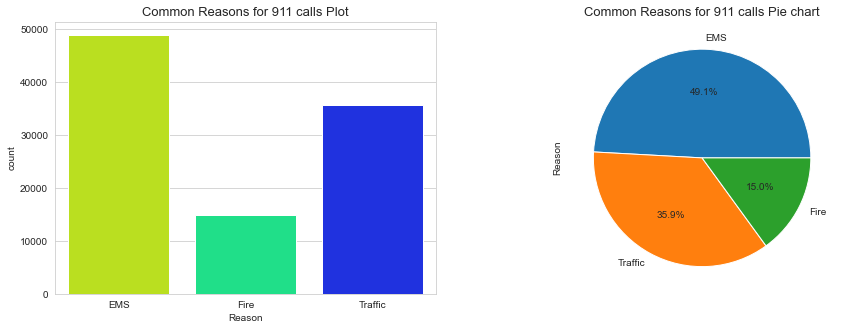

In [15]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Reason',data=test_data,ax=axes[0],palette="gist_rainbow")
axes[0].set_title('Common Reasons for 911 calls Plot',size=13)

Reason_count = test_data['Reason'].value_counts()
Reason_count.plot.pie(autopct='%1.1f%%',ax=axes[1],subplots=True)
axes[1].set_title('Common Reasons for 911 calls Pie chart',size=13)

__Overall actual reasons for calls__

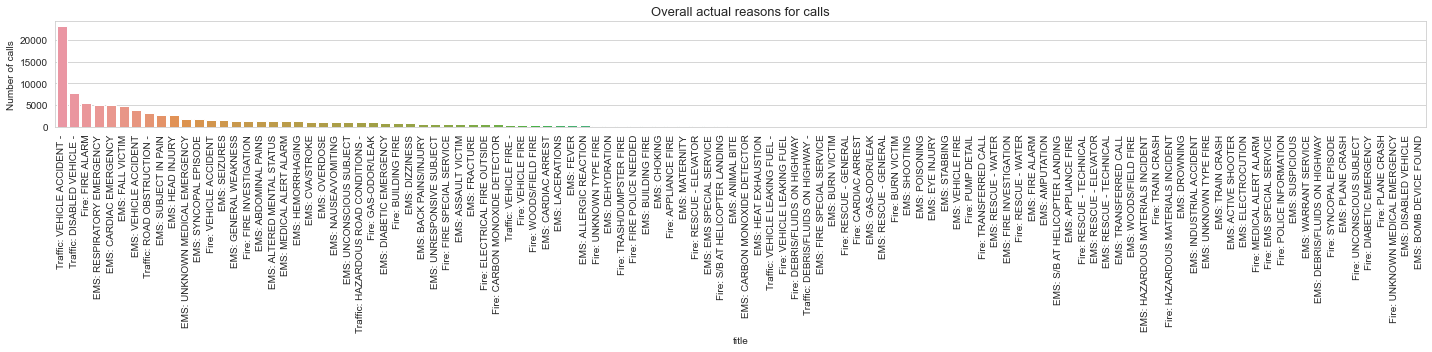

In [16]:
fig,axes = plt.subplots(figsize=(20,5))
sns.countplot(x='title',data=test_data,order=test_data['title'].value_counts().index)
axes.set_title('Overall actual reasons for calls',size = 13)
axes.set_ylabel('Number of calls')
plt.xticks(rotation = 90)
plt.tight_layout()

__Observation:__

- Arranged the reasons in decending order, having "Traffic: VEHICLE ACCIDENT -" as highest and "Fire: SYNCOPAL EPISODE" as least accidents occured.

__Calls received for each day in a week along with reason__

Text(0, 0.5, 'Number of calls')

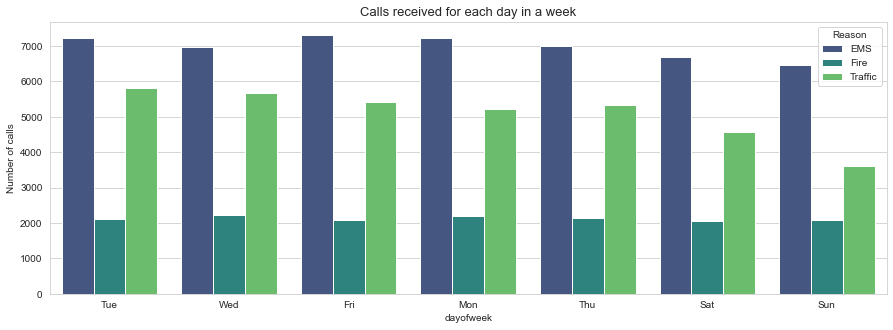

In [17]:
fig,axes = plt.subplots(figsize=(15,5))
sns.countplot(x='dayofweek',data=test_data,hue='Reason',order=test_data['dayofweek'].value_counts().index,palette="viridis")
axes.set_title('Calls received for each day in a week',size = 13)
axes.set_ylabel('Number of calls')

__Observation__
- We can see the weekly received calls along with each reason. 
- They receive most of emergency calls on Tuesday and least on sunday

__Calls received in month based on reason__

Text(0, 0.5, 'Number of calls')

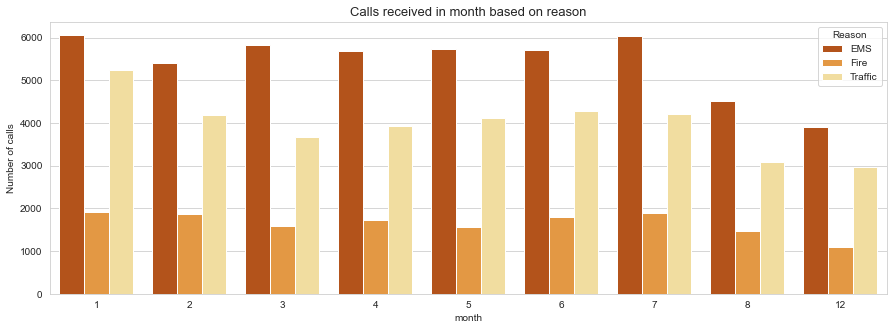

In [18]:
fig,axes = plt.subplots(figsize=(15,5))
sns.countplot(x='month',data=test_data,hue='Reason',palette="YlOrBr_r")
axes.set_title('Calls received in month based on reason',size = 13)
axes.set_ylabel('Number of calls')

__Observation__
- We can see the monthly received calls along with each reason. 
- Also, there is a gradual decrease of calls from as the month passes by.

__Date wise received calls with reasons:__
- Traffic
- EMS
- Fire

__Traffic__

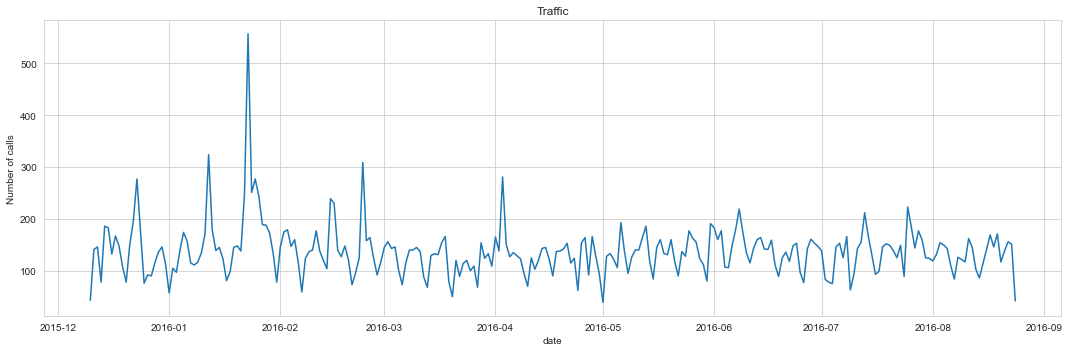

In [19]:
test_data[test_data['Reason']=='Traffic'].groupby('date').count()['lat'].plot(figsize=(15,5))
plt.title('Traffic')
plt.ylabel('Number of calls')
plt.tight_layout()

__EMS__

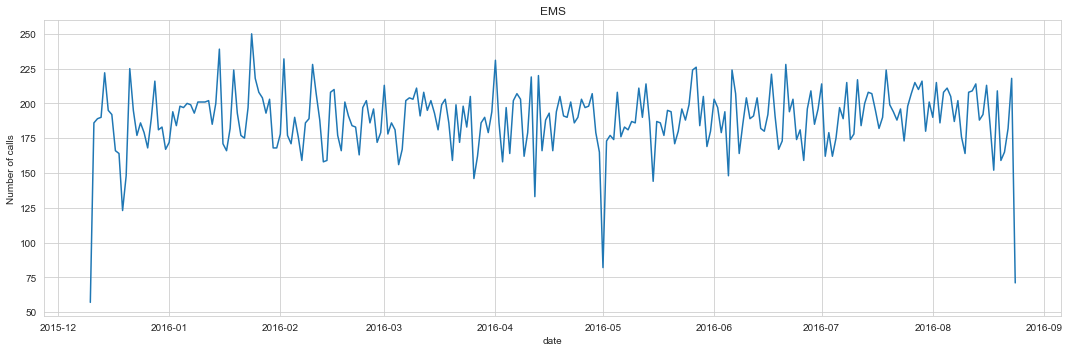

In [20]:
test_data[test_data['Reason']=='EMS'].groupby('date').count()['lat'].plot(figsize=(15,5))
plt.title('EMS')
plt.ylabel('Number of calls')
plt.tight_layout()

__Fire__

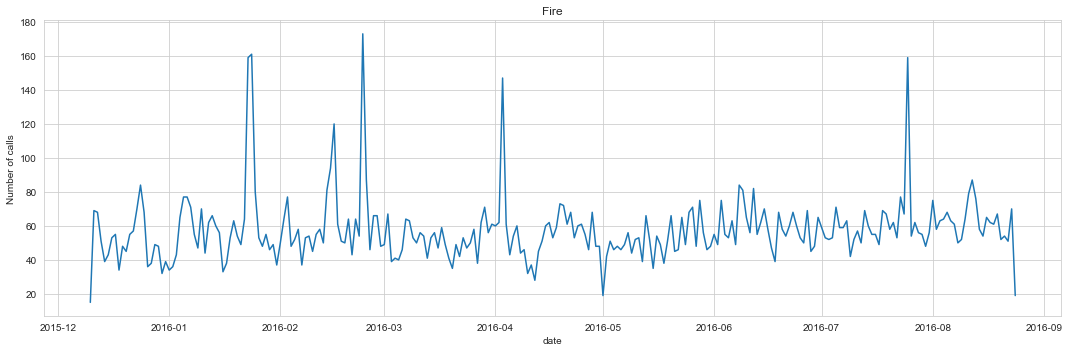

In [21]:
test_data[test_data['Reason']=='Fire'].groupby('date').count()['lat'].plot(figsize=(15,5))
plt.title('Fire')
plt.ylabel('Number of calls')
plt.tight_layout()

__HeatMap__


Text(0.5, 1.0, 'Heat Map For every hour in week')

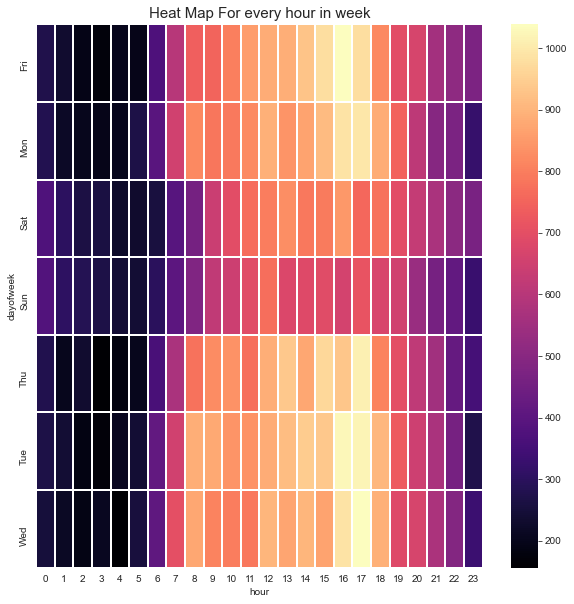

In [22]:
weekly_hour=test_data.groupby(['dayofweek','hour']).count()['Reason'].unstack()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(weekly_hour,cmap='magma',linecolor='white',linewidth=1)
plt.title('Heat Map For every hour in week',size=15)